In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
cd ..

/Users/cock/kDrive/PhD/Projects/Labs/beerslaw-lab/src


In [4]:
from extractors.sequencer.flat.plotter_sequencer import PlotterSequencing
from extractors.cleaners.break_filter import BreakFilter

# Data

In [5]:
root = '../data/parsed simulations/'
files = os.listdir(root)
files = [f for f in files if 'simulation.pkl' in f]

In [6]:
def process_events(begins, ends, labels):
    b = [begins[0]]
    e = [ends[0]]
    l = [labels[0]]
    
    for i, be, in enumerate(begins[1:]):
        if labels[i] == l[-1]:
            e[-1] = ends[i]
        else:
            l.append(labels[i])
            b.append(be)
            e.append(ends[i])
    return begins, ends, labels

In [7]:
events = {}
sequencer = PlotterSequencing()
for f in files:
    path = root + f
    with open(path, 'rb') as fp:
        sim = pickle.load(fp)
        begins, ends, labels = sequencer.get_sequences(sim)
        if len(begins) > 10:
            begins, ends, labels = process_events(begins, ends, labels)
            times = np.array(ends) - np.array(begins)
            events[f] = {
                'distribution':list(times),
                'permutation': sim.get_permutation()
            }


## plot distribution

In [8]:
def plot_events(event_distributions: list):
    """
    plot all the event distribution for the people in df
    """
    plt.figure(figsize=(12, 4))
    for student in event_distributions:
        plt.hist(student, density=True, color='dodgerblue', alpha=0.1, bins=np.arange(0, 10, 0.05))
        
    plt.show()

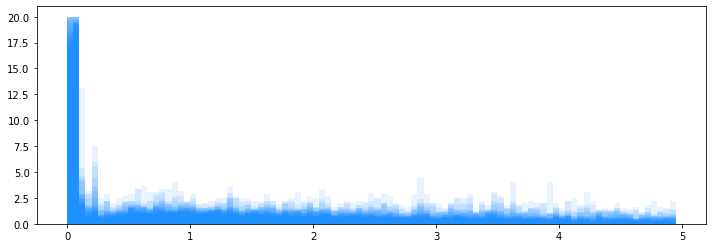

In [9]:
ks = list(events.keys())
dist = [events[k]['distribution'] for k in ks]
plot_events(dist)

## smaller sampling

In [12]:
dist[0]

[75.141,
 0.04999999999999716,
 0.04999999999999716,
 3.283999999999992,
 0.04999999999999716,
 0.04999999999999716,
 0.04999999999999716,
 0.04999999999999716,
 0.04999999999999716,
 0.04999999999999716,
 0.04999999999999716,
 0.04999999999999716,
 0.722999999999999,
 5.804000000000002,
 5.6640000000000015,
 0.5109999999999957,
 17.932999999999993,
 8.224999999999994,
 1.9609999999999843,
 0.6910000000000025,
 0.05000000000001137,
 0.05000000000001137,
 14.141999999999996,
 0.05000000000001137,
 1.5130000000000052,
 7.114000000000004,
 3.704999999999984,
 5.451000000000022,
 0.8689999999999998,
 0.7060000000000173,
 2.0529999999999973,
 2.705999999999989,
 2.149000000000001,
 3.907999999999987,
 58.17399999999998,
 0.7580000000000098,
 1.2869999999999777,
 1.0480000000000018,
 0.05000000000001137,
 0.05000000000001137,
 0.05000000000001137,
 0.05000000000001137,
 0.05000000000001137,
 0.05000000000001137,
 0.05000000000001137,
 0.4549999999999841,
 0.5120000000000005,
 1.2519999999999

In [16]:
[min(f) for f in dist]

[0.04999999999999716,
 0.04999999999999716,
 0.04999999999999716,
 0.05000000000001137,
 0.049999999999954525,
 0.04999999999999716,
 0.04999999999999716,
 0.049999999999954525,
 0.04999999999999716,
 0.01799999999997226,
 0.04999999999999716,
 0.04100000000000392,
 0.04999999999999716,
 0.04999999999999716,
 0.049999999999954525,
 0.04999999999999716,
 0.05000000000001137,
 0.04999999999999716,
 0.04999999999999716,
 0.04999999999999716,
 0.04999999999999716,
 0.04999999999999716,
 0.04999999999999716,
 0.049999999999954525,
 0.04999999999999716,
 0.04999999999999716,
 0.04399999999998272,
 0.049999999999954525,
 0.04999999999999716,
 0.049999999999954525,
 0.049999999999954525,
 0.04999999999999716,
 0.04999999999999716,
 0.049999999999954525,
 0.04999999999999716,
 0.04999999999999716,
 0.049999999999954525,
 0.04999999999999716,
 0.04999999999999716,
 0.04999999999999716,
 0.05000000000001137,
 0.04999999999999982,
 0.0009999999999763531,
 0.04999999999999716,
 0.049999999999954525